![Image in a markdown cell](https://cursos.utnba.centrodeelearning.com/pluginfile.php/1/theme_space/customlogo/1738330016/Logo%20UTN%20Horizontal.png)



# **Diplomado de Ciencia de Datos y Análisis Avanzado**
# **Unidad 5: Modelado Predictivo I**: Regresión y Clasificación

---

# **Proyecto de Competencia Kaggle: Predicción de Abandono de Clientes**

## **Curso:** Diplomado en Ciencia de Datos

# ***Nombres de los Miembros del Equipo: Grupo M***
### *   Lucia Cortes
### *   Maria Fernanda Farias
### *   Alejandro Gomez Grosschadl
### *   Favio Ruggieri
### *   Sergio Salanitri
### *   Karina Calvo

# **Objetivo:**
## El objetivo de este proyecto es construir y evaluar varios modelos de clasificación para predecir si un cliente de una compañía de telecomunicaciones abandonará o no el servicio (churn). El rendimiento final del mejor modelo se medirá en la competencia de Kaggle a través de la **métrica ROC AUC**.


---

# **Enlace para unirse a la competencia**
### **USE EL ENLACE PARA UNIRSE POR EQUIPO, NO DE MANERA INDIVIDUAL**

https://www.kaggle.com/t/57b70c381e4d451b8ae38e164b91a2aa


### **Por favor siga las indicaciones que se suministran en la plataforma**


# 0. **Configuración Inicial e Importación de Librerías**

## En esta sección, importaremos todas las librerías necesarias para el proyecto. Es una buena práctica tener todas las importaciones en la primera celda.


In [1]:
# Importaciones básicas
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV,train_test_split
from sklearn.metrics import (roc_auc_score, accuracy_score, precision_score, 
                           recall_score, f1_score, classification_report, 
                           confusion_matrix, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple, Any
import warnings
warnings.filterwarnings('ignore')


# Configurar visualizaciones
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Importar módulos del proyecto (si existen)
try:
    import data_loader
    import dataset_splitter
    import eda
    import models
    import metrics
    print("✅ Módulos del proyecto importados correctamente")
except ImportError as e:
    print(f"⚠️ Algunos módulos del proyecto no están disponibles: {e}")
    print("💡 Puedes trabajar directamente en el notebook por ahora")

✅ Módulos del proyecto importados correctamente


#  **1. Carga de Datos**

## Cargaremos los datasets proporcionados para la competencia: `train.csv`, `test.csv` y `sample_submission.csv`.

In [2]:
try:
    X_train = pd.read_csv('train.csv')
    X_test = pd.read_csv('test.csv')
    sample_submission_df = pd.read_csv('sample_submission.csv')
except FileNotFoundError:
    print("Asegúrate de que los archivos .csv de la competencia estén en el mismo directorio que este cuaderno.")
    # Si usas Colab, puedes subir los archivos al entorno de ejecución.
    exit()

print("Forma del dataset de entrenamiento:", X_train.shape)
print("Forma del dataset de prueba:", X_test.shape)

print("\nPrimeras 5 filas del dataset de entrenamiento:")
display(X_train.head())

print("\nPrimeras 5 filas del dataset de prueba:")
display(X_test.head())

Forma del dataset de entrenamiento: (5634, 21)
Forma del dataset de prueba: (1409, 20)

Primeras 5 filas del dataset de entrenamiento:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,No
1,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,No
2,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,...,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,No
3,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.70,No
4,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,No



Primeras 5 filas del dataset de prueba:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,4376-KFVRS,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),114.05,8468.20
1,2754-SDJRD,Female,1,No,No,8,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.15,908.55
2,9917-KWRBE,Female,0,Yes,Yes,41,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),78.35,3211.20
3,0365-GXEZS,Male,0,Yes,No,18,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,78.20,1468.75
4,9385-NXKDA,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),82.65,5919.35


# 2**. Análisis Exploratorio de Datos (EDA)**

### En esta fase, exploraremos el dataset de entrenamiento para entender mejor nuestros datos, encontrar patrones, identificar valores faltantes y visualizar relaciones entre las características y la variable objetivo (`Churn`).

## Objetivo: conocer distribución de datos, target, tipos de columnas.

Variables como Contract, InternetService, PaymentMethod requieren OneHotEncoding o LabelEncoding.

Target Churn: dataset más desbalanceado (~20% churn). #Verificar el desbalanceo.

## Descripción de parámetros




📊 INFORMACIÓN GENERAL DEL DATASET
Dimensiones: (5634, 21)
Columnas: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

📋 Tipos de datos:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
d

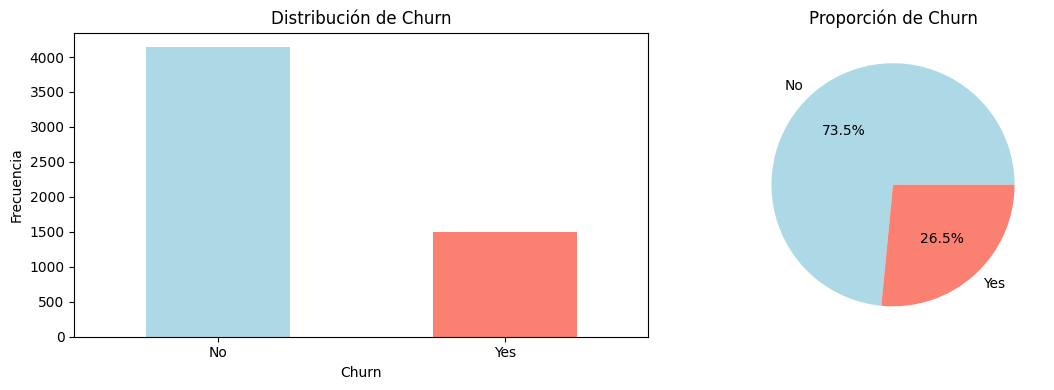

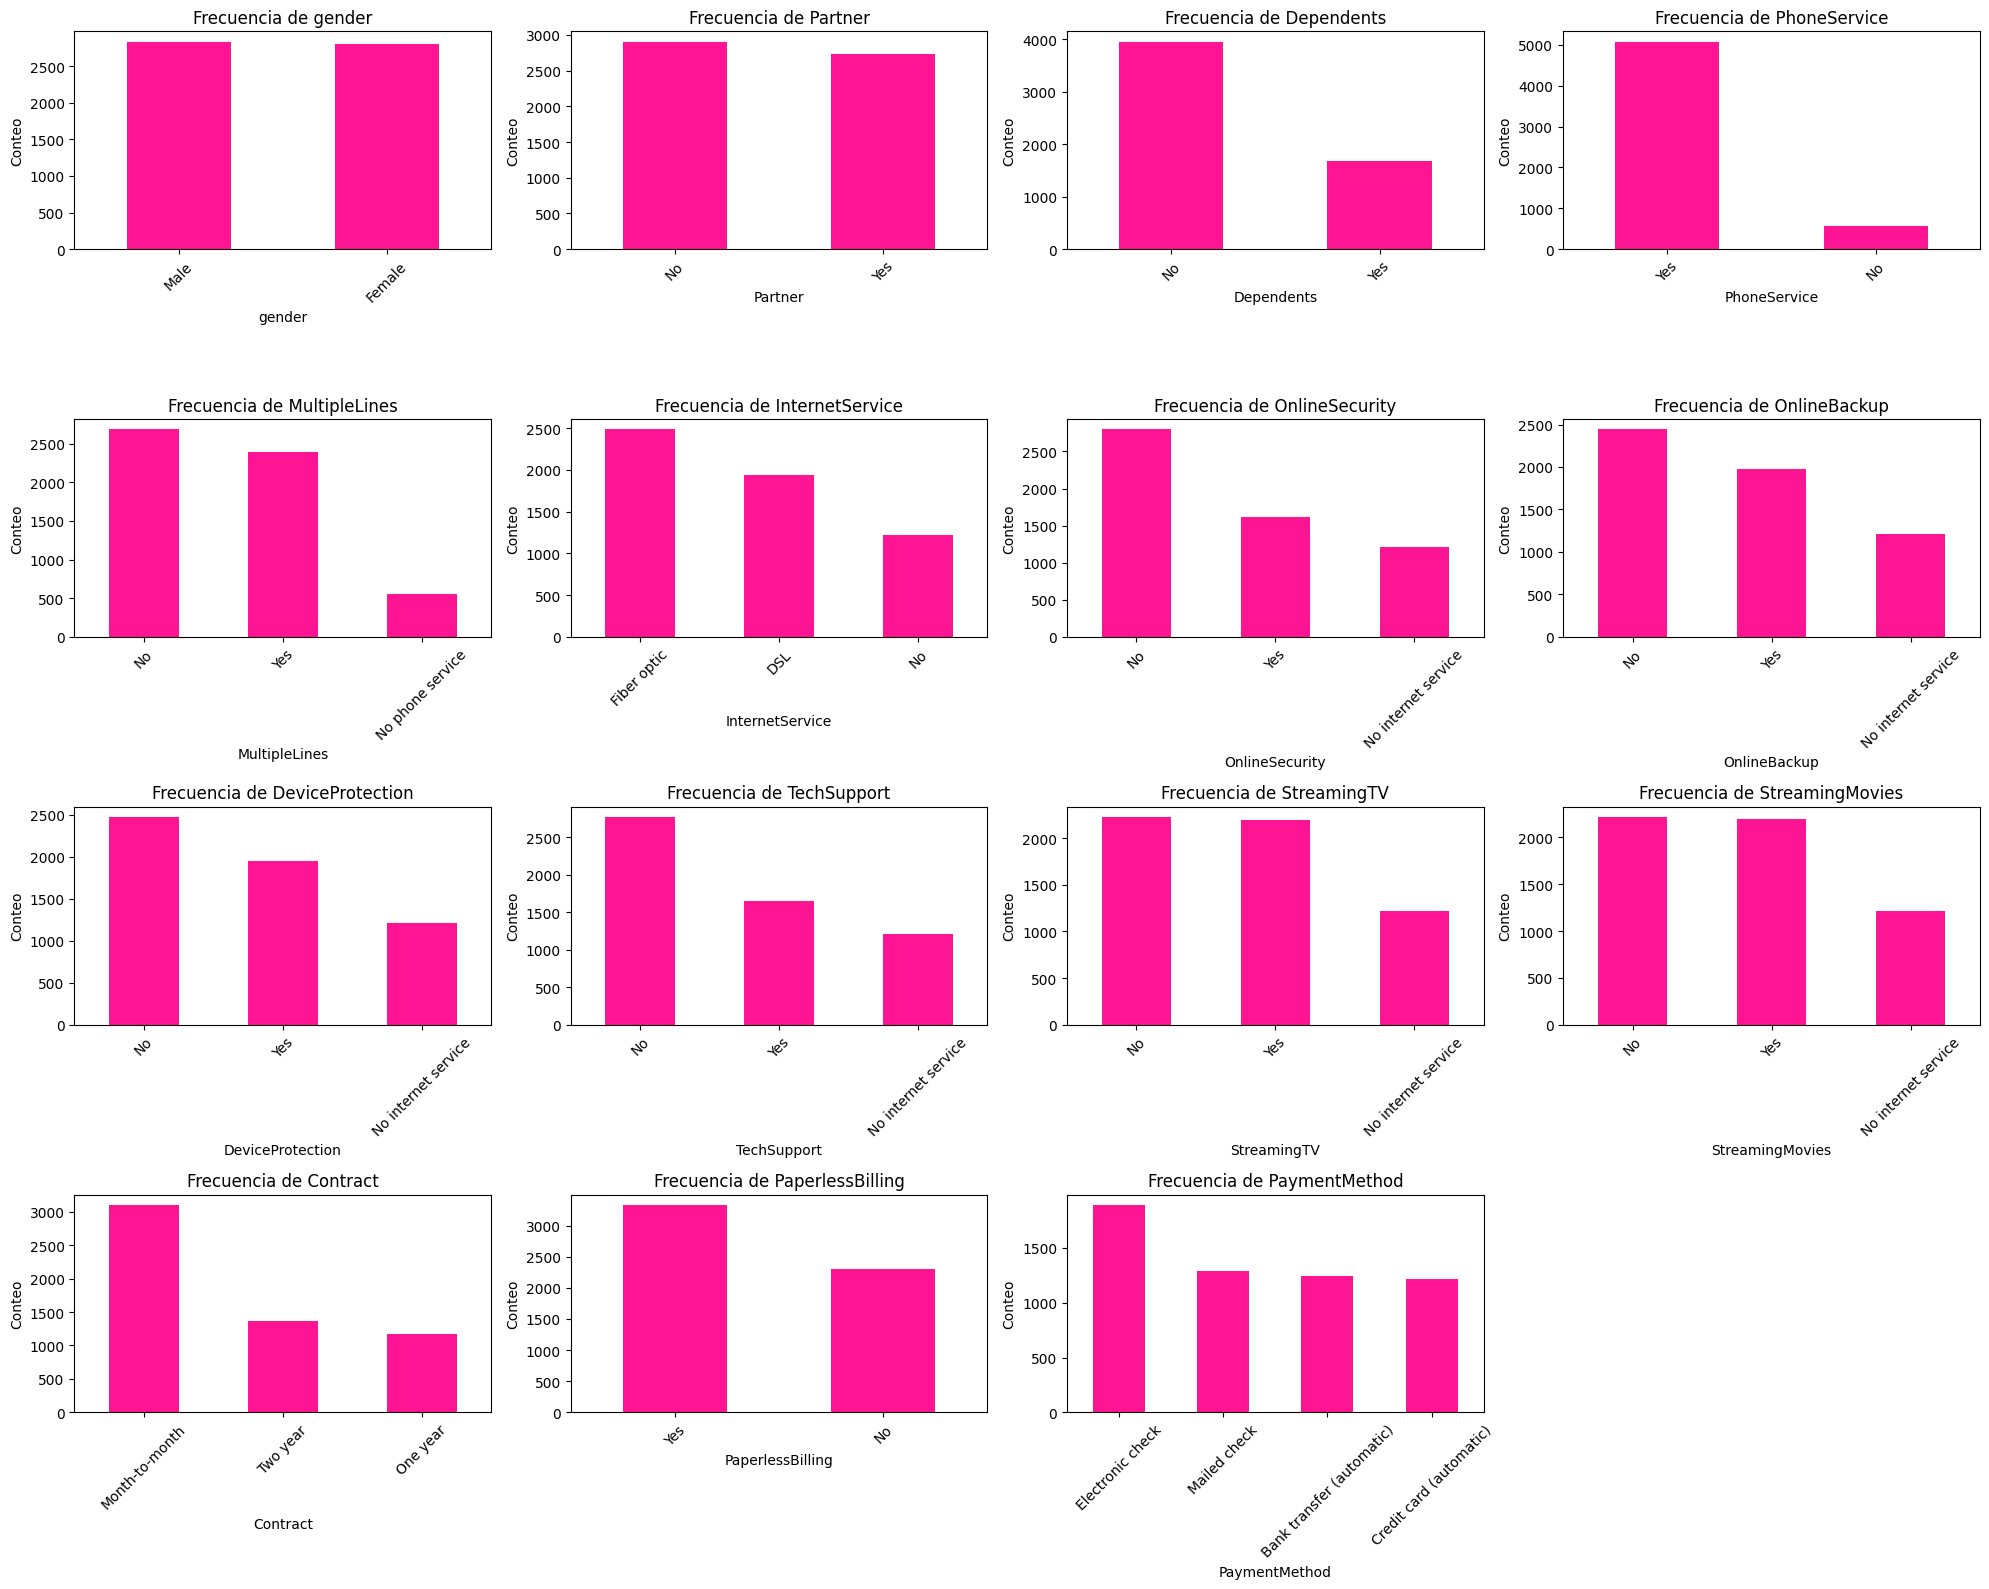

In [3]:
# Información general del dataset
print("📊 INFORMACIÓN GENERAL DEL DATASET")
print("=" * 50)
print(f"Dimensiones: {X_train.shape}")
print(f"Columnas: {list(X_train.columns)}")
print("\n📋 Tipos de datos:")
print(X_train.dtypes)

# Información sobre valores faltantes
print("\n🔍 VALORES FALTANTES:")
print("=" * 30)
missing_values = X_train.isnull().sum()
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("✅ No hay valores faltantes")

# Distribución de la variable objetivo
print("\n🎯 DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (Churn):")
print("=" * 50)
y_train = X_train['Churn']
churn_counts = y_train.value_counts()
#Definición de variable objetivo
churn_pct = y_train.value_counts(normalize=True) * 100
print(f"No Churn (0): {churn_counts[0]} ({churn_pct[0]:.1f}%)")
print(f"Churn (1): {churn_counts[1]} ({churn_pct[1]:.1f}%)")

# Visualización de la distribución del target
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Distribución de Churn')
plt.xlabel('Churn')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
y_train.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Proporción de Churn')
plt.ylabel('')

plt.tight_layout()
plt.show()

#Mostrar frecuenbcia de variables categóricas
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Mostrar frecuencias de variables categóricas en una grilla 4x4
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    X_train[col].value_counts().plot(kind='bar', color='deeppink', ax=axes[i])
    axes[i].set_title(f'Frecuencia de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Conteo')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos si hay menos de 16 columnas
for j in range(len(categorical_columns), 16):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [4]:
# 🔧 CONFIGURACIÓN Y ENTRENAMIENTO DEL CHURNPREDICTOR

from models import ChurnPredictor

print("🚀 Inicializando ChurnPredictor...")

# Usar los datos ORIGINALES (antes del preprocesamiento) para crear el preprocesador
predictor = ChurnPredictor(random_state=42)

# Verificar y limpiar datos antes del preprocesamiento
print("🔍 Verificando datos antes del preprocesamiento...")

# Asumir que X_train son los datos originales (con customerID y sin procesar)
# Necesitamos remover customerID de X_train si existe
if 'customerID' in X_train.columns:
    X_train_clean = X_train.drop(['customerID'], axis=1)
else:
    X_train_clean = X_train.copy()

#customerIDs lo guardo para usarn en la generación del archivo de submit.
customer_ids = X_test['customerID']

# Necesitamos remover customerID de X_test si existe
if 'customerID' in X_test.columns:
    X_test_clean = X_test.drop(['customerID'], axis=1)
else:
    X_test_clean = X_test.copy()


# SINCRONIZACIÓN FINAL: Asegurar que X e y tengan el mismo número de muestras
if X_train_clean.shape[0] != y_train.shape[0]:
    print("⚠️ Sincronizando datos finales:")
    print(f"   - X_train_clean: {X_train_clean.shape[0]} → ", end="")
    print(f"   - y_train: {y_train.shape[0]} → ", end="")
    
    min_samples = min(X_train_clean.shape[0], y_train.shape[0])
    X_train_clean = X_train_clean.iloc[:min_samples]
    y_train_sync = y_train.iloc[:min_samples] if hasattr(y_train, 'iloc') else y_train[:min_samples]
    
    print(f"Sincronizados a {min_samples} muestras")
else:
    y_train_sync = y_train
    print("✅ Datos ya están sincronizados")

    

🚀 Inicializando ChurnPredictor...
🗺️  ChurnPredictor inicializado con random_state=42
🔍 Verificando datos antes del preprocesamiento...
✅ Datos ya están sincronizados


# **3. Preprocesamiento de Datos**

## Prepararemos los datos para que puedan ser utilizados por los modelos de Machine Learning.

In [5]:
# IMPORTANTE: Mapear y_train_sync para consistencia de tipos
print("\n🔧 Mapeando y_train_sync a formato numérico...")
y_train_sync = predictor.map_target(y_train_sync)

# Crear el preprocesador con los datos originales
preprocessor = predictor.create_preprocessor(X_train_clean)

print("✅ Preprocesador configurado exitosamente")
print(f"📊 Características procesadas: {X_train_clean.shape[1]}")
print(f"📊 Muestras para entrenamiento: {X_train_clean.shape[0]}")


🔧 Mapeando y_train_sync a formato numérico...
🗺️  Mapeando variable objetivo...
✅ Variable objetivo mapeada: 'No'->0, 'Yes'->1
🗺️  Creando preprocesador mejorado...
🗺️  Características categóricas (15): ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
🗺️  Características numéricas (4): ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
✅ Preprocesador mejorado creado exitosamente
✅ Preprocesador configurado exitosamente
📊 Características procesadas: 20
📊 Muestras para entrenamiento: 5634


In [6]:
# # 3.1 - Preprocesamiento de datos usando los modelos creados
# from models import ChurnPredictor

# # Inicializar el predictor
# predictor = ChurnPredictor(random_state=42)

# # Crear el preprocesador
# predictor.create_preprocessor(X_train)

# print("✅ Preprocesador configurado exitosamente")
# X_features = X_train.shape[1]
# print(f"📊 Características a procesar: {X_features}")

# #Mostrar estado de columnas luego del preprocesamiento.
# predictor.inspect_transformed_columns(
#     X_original=X_train,
#     columns=['Partner', 'Dependents', 'Contract', 'PaymentMethod']
# )

# # Mostrar información del preprocesador
# print("\n🔧 Configuración del preprocesador:")
# numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
# categorical_features = X_train.select_dtypes(include=['object']).columns                      
                                         
# print(f"   - Características numéricas: {len(numeric_features)} : {numeric_features}")
# print(f"   - Características categóricas: {len(categorical_features)}: {categorical_features}")

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
🔗 ANÁLISIS DE CORRELACIONES
⚠️ Correlaciones altas (|r| >= 0.7):
   - tenure ↔ TotalCharges: 0.829


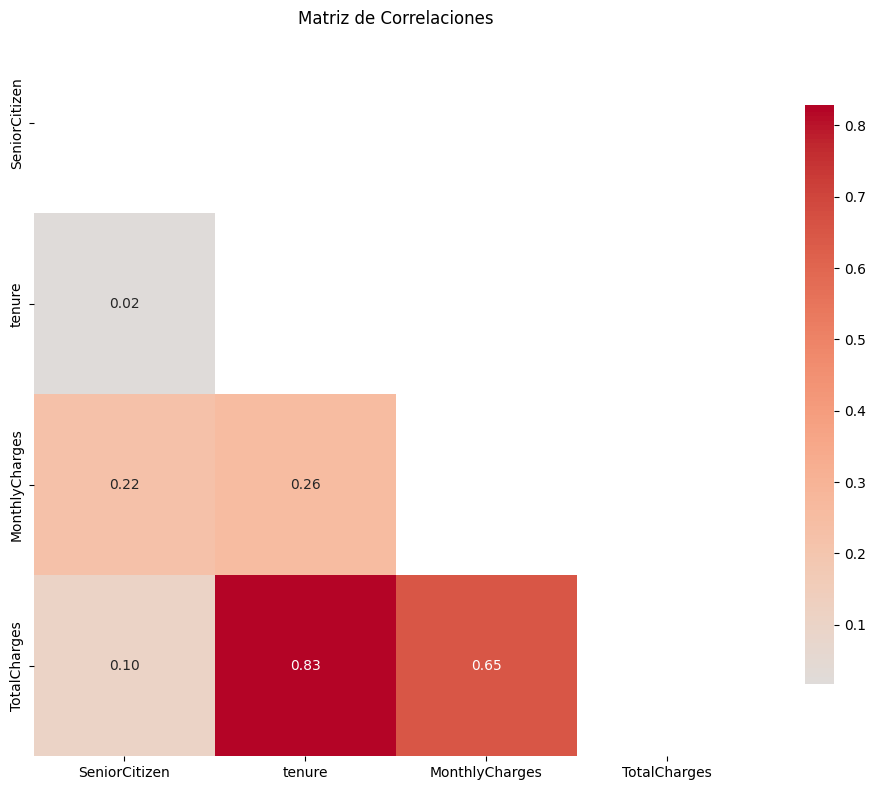

⚠️ No se puede mostrar correlaciones con variable objetivo: '['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']' no está en las columnas numéricas o no se especificó.


In [7]:

#Calculo de correlaciones
from eda import correlation_analysis,show_correlation_respect_to_feature

print(X_train_clean.columns)

#show_correlation_respect_to_feature(X_train_clean,'Churn')

target_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
correlation_analysis(X_train,target_cols)


In [8]:
# # 3.1 - Preprocesamiento de datos usando los modelos creados
# # RECARGAR MÓDULO MODELS CON CORRECCIONES (VERSIÓN ACTUALIZADA)
# import importlib
# import sys

# # Limpiar módulo del cache
# if 'models' in sys.modules:
#     del sys.modules['models']

# # Importar y recargar
# import models
# importlib.reload(models)
# from models import ChurnPredictor

# print("🔄 Módulo models recargado con correcciones aplicadas")
# print("✅ Correcciones incluidas:")
# print("   - Fix para transformer 'bin' no existente")
# print("   - Manejo robusto de columnas transformadas")
# print("   - Corrección en map_target para numpy arrays")

# # Reinicializar el predictor
# predictor = ChurnPredictor(random_state=42)

# # Crear el preprocesador
# predictor.create_preprocessor(X_train_clean)

# predictor.inspect_transformed_columns(
#      X_original=X_train,
#      columns=['Partner', 'Dependents', 'Contract', 'PaymentMethod']
# )

# # Crear los modelos (esto automáticamente usa el preprocesador)
# models_dict = predictor.create_models()

# # ENTRENAR con los datos sincronizados
# print("\n🎯 Iniciando entrenamiento con datos sincronizados...")
# predictor.train_models(X_train_clean, y_train_sync)

# print("\n🎉 Entrenamiento completado para todos los modelos:")
# for model_name in models_dict.keys():
#     print(f"   ✅ {model_name}")

# print(f"\n📊 Resumen del entrenamiento:")
# print(f"   - Datos de entrenamiento: {X_train_clean.shape}")
# print(f"   - Etiquetas: {y_train_sync.shape if hasattr(y_train_sync, 'shape') else len(y_train_sync)}")
# print(f"   - Modelos entrenados: {len(models_dict)}")

In [9]:
# # 3.2 - Inspección de transformaciones de columnas
# # La función inspect_transformed_columns es un MÉTODO de la clase ChurnPredictor
# # Se debe llamar usando la instancia: predictor.inspect_transformed_columns()

# print("🔍 Inspeccionando transformaciones de columnas específicas...")

# try:
#     # Usar el MÉTODO de la instancia predictor (no como función independiente)
#     predictor.inspect_transformed_columns(
#         X_original=X_train,
#         columns=['Partner', 'Dependents', 'Contract', 'PaymentMethod'],
#         fit=False  # False porque ya hicimos fit anteriormente
#     )
# except Exception as e:
#     print(f"⚠️ Error al inspeccionar columnas: {e}")
#     print("💡 Continuando con el análisis básico...")
    
#     # Análisis alternativo si la función falla
#     print("\n📊 Análisis básico de columnas seleccionadas:")
#     selected_cols = ['Partner', 'Dependents', 'Contract', 'PaymentMethod']
#     for col in selected_cols:
#         if col in X_train.columns:
#             print(f"   - {col}: {X_train[col].unique()}")
#         else:
#             print(f"   - {col}: ❌ No encontrada en el dataset")

In [10]:
# # 3.1.1 Crear preprocesador para LogisticRegression
# # RECARGAR MÓDULO MODELS CON CORRECCIONES (VERSIÓN ACTUALIZADA)
# import importlib
# import sys

# # Limpiar módulo del cache
# if 'models' in sys.modules:
#     del sys.modules['models']

# # Importar y recargar
# import models
# importlib.reload(models)
# from models import ChurnPredictor

# print("🔄 Módulo models recargado con correcciones aplicadas")
# print("✅ Correcciones incluidas:")
# print("   - Fix para transformer 'bin' no existente")
# print("   - Manejo robusto de columnas transformadas")
# print("   - Corrección en map_target para numpy arrays")

# # Reinicializar el predictor
# predictor = ChurnPredictor(random_state=42)

# # Crear el preprocesador
# predictor.create_preprocessor(X_train_clean)

# predictor.inspect_transformed_columns(
#      X_original=X_train,
#      columns=['Partner', 'Dependents', 'Contract', 'PaymentMethod']
# )

# **4. Modelado y Evaluación**

## Ahora entrenaremos y evaluaremos los tres modelos requeridos:
## Regresión Logística, k-NN y Naive Bayes.

## **4.1. Preparación de datos de validación de train y test.**

In [11]:
# Celda única para importar siempre la versión más reciente de tu clase

import sys
import importlib

# Ruta a tu módulo (ajustá si es necesario)
module_name = "models"

# Eliminar del caché de módulos si ya estaba cargado
if module_name in sys.modules:
    del sys.modules[module_name]

# Importar y recargar
import models
importlib.reload(models)

# Instanciar la clase
if predictor is None:
    predictor = models.ChurnPredictor()
    print('Clase predicto instanciada')

print('Se actualizaron las instancias necesarias')


Se actualizaron las instancias necesarias


In [12]:
# 4.1 Modelado 
print("🤖 Iniciando entrenamiento de modelos...")

# Preparar datos para la división train/validation
print("🔧 Preparando datos para división train/validation...")

# Cargar datos originales si es necesario
try:
    # Separar features y target
    y = X_train["Churn"]
    print(f"📊 Variable objetivo extraída: {y.shape}")
    
    # Extraer características (X) - remover Churn y customerID
    columns_to_drop = ['Churn']
    if 'customerID' in X_train.columns:
        columns_to_drop.append('customerID')
  
    X = X_train.drop(columns_to_drop, axis=1)
    print(f"📊 Características extraídas: {X.shape}")
    print(f"📋 Columnas removidas: {columns_to_drop}")
    
except Exception as e:
    print(f"❌ Error preparando datos: {e}")
    print("💡 Asegúrate de que el dataset esté cargado correctamente")

# Dividir datos en entrenamiento y validación interna
print("\n🔄 Dividiendo datos en train/validation interno...")
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

🤖 Iniciando entrenamiento de modelos...
🔧 Preparando datos para división train/validation...
📊 Variable objetivo extraída: (5634,)
📊 Características extraídas: (5634, 19)
📋 Columnas removidas: ['Churn', 'customerID']

🔄 Dividiendo datos en train/validation interno...


## **4.2 Crear los preprocesadores para datos de validación**

In [13]:
# 4.2.1 Crear preprocesador para el modelo LogisticRegression

#Preprocesador para LogisticRegression
try:
    preprocessor_logistic_regression = predictor.create_preprocessor_logistic_regression(X_train_split)
    
    print("✅ Preprocesador para LogisticRegression configurado exitosamente")
    X_val_features = X_train_split.shape[1]
    print(f"📊 Características a procesar: {X_val_features}")
    
    #Mostrar estado de columnas luego del preprocesamiento.
    # predictor.inspect_transformed_columns(
    #     X_original=X_train_split,
    #     columns=['Partner', 'Dependents', 'Contract', 'PaymentMethod']
    # )
    
    # Mostrar información del preprocesador
    print("\n🔧 Configuración del preprocesador:")
    numeric_features = X_train_split.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_train_split.select_dtypes(include=['object']).columns                      
                                             
    print(f"   - Características numéricas: {len(numeric_features)} : {numeric_features}")
    print(f"   - Características categóricas: {len(categorical_features)}: {categorical_features}")
except Exception as e:
    print(f"❌ Error preprocesando los datos: {e}")
    print("💡 Asegúrate de que el dataset esté cargado correctamente") 



✅ Preprocesador para LogisticRegression configurado exitosamente
📊 Características a procesar: 19

🔧 Configuración del preprocesador:
   - Características numéricas: 4 : Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
   - Características categóricas: 15: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [14]:
# 4.2.2 Crear preprocesador para el modelo KNN

#Preprocesador para KNN
try:
    preprocessor_knn = predictor.create_preprocessor_knn(X_train_split)
    
    print("✅ Preprocesador para KNN configurado exitosamente")
    X_val_features = X_train_split.shape[1]
    print(f"📊 Características a procesar: {X_val_features}")
    
    #Mostrar estado de columnas luego del preprocesamiento.
    # predictor.inspect_transformed_columns(
    #     X_original=X_train_split,
    #     columns=['Partner', 'Dependents', 'Contract', 'PaymentMethod']
    # )
    
    # Mostrar información del preprocesador
    print("\n🔧 Configuración del preprocesador:")
    numeric_features = X_train_split.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_train_split.select_dtypes(include=['object']).columns                      
                                             
    print(f"   - Características numéricas: {len(numeric_features)} : {numeric_features}")
    print(f"   - Características categóricas: {len(categorical_features)}: {categorical_features}")
except Exception as e:
    print(f"❌ Error preprocesando los datos: {e}")
    print("💡 Asegúrate de que el dataset esté cargado correctamente") 



✅ Preprocesador para KNN configurado exitosamente
📊 Características a procesar: 19

🔧 Configuración del preprocesador:
   - Características numéricas: 4 : Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
   - Características categóricas: 15: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [15]:
# 4.2.3 Crear preprocesador para el modelo RandomForest

#Preprocesador para RandomForest
try:
    preprocessor_random_forest = predictor.create_preprocessor_random_forest(X_train_split)
    
    print("✅ Preprocesador para RandomForest configurado exitosamente")
    X_val_features = X_train_split.shape[1]
    print(f"📊 Características a procesar: {X_val_features}")
    
    #Mostrar estado de columnas luego del preprocesamiento.
    # predictor.inspect_transformed_columns(
    #     X_original=X_val,
    #     columns=['Partner', 'Dependents', 'Contract', 'PaymentMethod']
    # )
    
    # Mostrar información del preprocesador
    print("\n🔧 Configuración del preprocesador:")
    numeric_features = X_train_split.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_train_split.select_dtypes(include=['object']).columns                      
                                             
    print(f"   - Características numéricas: {len(numeric_features)} : {numeric_features}")
    print(f"   - Características categóricas: {len(categorical_features)}: {categorical_features}")
except Exception as e:
    print(f"❌ Error preprocesando los datos: {e}")
    print("💡 Asegúrate de que el dataset esté cargado correctamente") 



✅ Preprocesador para RandomForest configurado exitosamente
📊 Características a procesar: 19

🔧 Configuración del preprocesador:
   - Características numéricas: 4 : Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
   - Características categóricas: 15: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [16]:
# 4.2.4 Crear preprocesador para el modelo Naives Bayes

#Preprocesador para Naives Bayes
try:
    preprocessor_naive_bayes = predictor.create_preprocessor_naive_bayes(X_train_split)
    
    print("✅ Preprocesador para Naives Bayes configurado exitosamente")
    X_val_features = X_train_split.shape[1]
    print(f"📊 Características a procesar: {X_val_features}")
    
    #Mostrar estado de columnas luego del preprocesamiento.
    # predictor.inspect_transformed_columns(
    #     X_original=X_train_split,
    #     columns=['Partner', 'Dependents', 'Contract', 'PaymentMethod']
    # )
    
    # Mostrar información del preprocesador
    print("\n🔧 Configuración del preprocesador:")
    numeric_features = X_train_split.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_train_split.select_dtypes(include=['object']).columns                      
                                             
    print(f"   - Características numéricas: {len(numeric_features)} : {numeric_features}")
    print(f"   - Características categóricas: {len(categorical_features)}: {categorical_features}")
except Exception as e:
    print(f"❌ Error preprocesando los datos: {e}")
    print("💡 Asegúrate de que el dataset esté cargado correctamente") 



✅ Preprocesador para Naives Bayes configurado exitosamente
📊 Características a procesar: 19

🔧 Configuración del preprocesador:
   - Características numéricas: 4 : Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
   - Características categóricas: 15: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [17]:
# 4.2.4 Crear preprocesador para el modelo XGBoost

#Preprocesador para XGBoost
try:
    preprocessor_xgboost = predictor.create_preprocessor_xgboost(X_train_split)
    
    print("✅ Preprocesador para XGBoost configurado exitosamente")
    X_val_features = X_train_split.shape[1]
    print(f"📊 Características a procesar: {X_val_features}")
    
    #Mostrar estado de columnas luego del preprocesamiento.
    # predictor.inspect_transformed_columns(
    #     X_original=X_train_split,
    #     columns=['Partner', 'Dependents', 'Contract', 'PaymentMethod']
    # )
    
    # Mostrar información del preprocesador
    print("\n🔧 Configuración del preprocesador:")
    numeric_features = X_train_split.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_train_split.select_dtypes(include=['object']).columns                      
                                             
    print(f"   - Características numéricas: {len(numeric_features)} : {numeric_features}")
    print(f"   - Características categóricas: {len(categorical_features)}: {categorical_features}")
except Exception as e:
    print(f"❌ Error preprocesando los datos: {e}")
    print("💡 Asegúrate de que el dataset esté cargado correctamente") 



❌ Error preprocesando los datos: Aún no implementado
💡 Asegúrate de que el dataset esté cargado correctamente


In [18]:
# 4.2.5 Crear preprocesador para el modelo SVM

#Preprocesador para SVM
try:
    preprocessor_svm = predictor.create_preprocessor_svm(X_train_split)
    
    print("✅ Preprocesador para SVM configurado exitosamente")
    X_val_features = X_train_split.shape[1]
    print(f"📊 Características a procesar: {X_val_features}")
    
    #Mostrar estado de columnas luego del preprocesamiento.
    predictor.inspect_transformed_columns(
        X_original=X_train_split,
        columns=['Partner', 'Dependents', 'Contract', 'PaymentMethod']
    )
    
    # Mostrar información del preprocesador
    print("\n🔧 Configuración del preprocesador:")
    numeric_features = X_train_split.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_train_split.select_dtypes(include=['object']).columns                      
                                             
    print(f"   - Características numéricas: {len(numeric_features)} : {numeric_features}")
    print(f"   - Características categóricas: {len(categorical_features)}: {categorical_features}")
except Exception as e:
    print(f"❌ Error preprocesando los datos: {e}")
    print("💡 Asegúrate de que el dataset esté cargado correctamente") 



❌ Error preprocesando los datos: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'
💡 Asegúrate de que el dataset esté cargado correctamente


## 4.3.1 - **Crear los modelos**

In [19]:
# 4.3.1 Crear los modelos

# Datos a evaluar
print("\n📊 X_val : ")
display(X_val.head(5))
print("\n📊 y_val original")
display(y_val.head(5))   

# IMPORTANTE: Mapear TANTO y_train_split como y_val para consistencia de tipos
print("\n📊 Mapeando datos para entrenamiento y evaluación...")
y_train_mapped = predictor.map_target(y_train_split)  # Mapear datos de entrenamiento
y_val_mapped = predictor.map_target(y_val)           # Mapear datos de validación

print("\n📊 y_train_mapped")
display(y_train_mapped.head(5))   
print("\n📊 y_val_mapped")
display(y_val_mapped.head(5))   

models = predictor.create_models(X_train)


# Actualizar y_val para evaluación posterior
y_val = y_val_mapped


📊 X_val : 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4882,Male,0,Yes,Yes,47,Yes,No,Fiber optic,Yes,No,Yes,No,No,Yes,Month-to-month,No,Electronic check,90.05,4137.20
515,Female,0,No,No,47,Yes,Yes,DSL,Yes,No,Yes,Yes,No,No,Two year,Yes,Mailed check,65.00,2879.90
4694,Female,0,Yes,Yes,14,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.55,294.50
42,Male,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.20,19.20
11,Female,0,Yes,Yes,5,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.40,232.55



📊 y_val original


4882    No
515     No
4694    No
42      No
11      No
Name: Churn, dtype: object


📊 Mapeando datos para entrenamiento y evaluación...
🗺️  Mapeando variable objetivo...
✅ Variable objetivo mapeada: 'No'->0, 'Yes'->1
🗺️  Mapeando variable objetivo...
✅ Variable objetivo mapeada: 'No'->0, 'Yes'->1

📊 y_train_mapped


5100    0
2777    0
2627    0
2185    1
4147    0
Name: Churn, dtype: int64


📊 y_val_mapped


4882    0
515     0
4694    0
42      0
11      0
Name: Churn, dtype: int64

🗺️  Creando modelos...
🗺️  Creando preprocesador mejorado...
🗺️  Características categóricas (15): ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
🗺️  Características numéricas (8): ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'avg_monthly', 'tenure_group', 'new_customer', 'high_monthly_charge']
✅ Preprocesador mejorado creado exitosamente
              model block transformer_type                                                                     steps                                                                                                                                                                                                         columns
Logistic_Regression   num         Pipeline                                           SimpleImputer -> StandardScaler        

## 4.3.2 - **Entrenar los modelos**

In [20]:
# Entrenar los modelos (esto automáticamente usa el preprocesador optimizado para cada caso)
#Recrear modelos con preprocessor fitted

models = predictor.create_models(X_train_split)
print(f"✅ Modelos recreados: {list(models.keys())}")

# Entrenar modelos
print("\n🎯 Entrenando modelos con datos limpios...")
try:
    predictor.train_models(X_train_split, y_train_mapped)
    print("✅ Entrenamiento completado sin errores")
except Exception as e:
    print(f"❌ Error en entrenamiento: {e}")

print("\n🚀 Paso 3: Verificar que los modelos están listos para evaluación")

# Verificar estado de los modelos
for name, model in predictor.models.items():
    print(f"\n🔍 Verificando {name}:")
    
    # Verificar que el pipeline tiene preprocessor fitted
    if hasattr(model, 'named_steps') and 'preprocessor' in model.named_steps:
        preprocessor = model.named_steps['preprocessor']
        if hasattr(preprocessor, 'transformers_'):
            print(f"   ✅ Preprocessor fitted correctamente")
        else:
            print(f"   ❌ Preprocessor no fitted")
    
    # Test de predicción simple
    try:
        # Tomar una muestra pequeña para test
        sample_X = X_val.head(5)
        sample_pred = model.predict(sample_X)
        sample_proba = model.predict_proba(sample_X)
        print(f"   ✅ Predicción test exitosa: {len(sample_pred)} predicciones")
    except Exception as e:
        print(f"   ❌ Error en test de predicción: {e}")


🗺️  Creando modelos...
🗺️  Creando preprocesador mejorado...
🗺️  Características categóricas (15): ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
🗺️  Características numéricas (8): ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'avg_monthly', 'tenure_group', 'new_customer', 'high_monthly_charge']
✅ Preprocesador mejorado creado exitosamente
              model block transformer_type                                                                     steps                                                                                                                                                                                                         columns
Logistic_Regression   num         Pipeline                                           SimpleImputer -> StandardScaler        

## **4.4 - Evaluación de modelos**

🗺️  Evaluando modelos...
🗺️  Evaluando Logistic_Regression...
✅ Logistic_Regression evaluado - ROC AUC: 0.8528
🗺️  Evaluando Random_Forest...
✅ Random_Forest evaluado - ROC AUC: 0.8459
🗺️  Evaluando Gradient_Boosting...
✅ Gradient_Boosting evaluado - ROC AUC: 0.8322
🗺️  Evaluando Naive_Bayes...
✅ Naive_Bayes evaluado - ROC AUC: 0.8249
🗺️  Evaluando KNN...
✅ KNN evaluado - ROC AUC: 0.7950
✅ Evaluación completada!
🗺️  Seleccionando mejor modelo por ROC_AUC...
✅ Mejor modelo: Logistic_Regression (ROC_AUC: 0.8528)
🗺️  Generando reporte de modelos...

REPORTE DETALLADO DE MODELOS

MODELO: Logistic_Regression
----------------------------------------
Accuracy:  0.7587
Precision: 0.8050
Recall:    0.7587
F1-Score:  0.7704
ROC AUC:   0.8528

Matriz de Confusión para Logistic_Regression
   TN:  622 | FP:  206
   FN:   66 | TP:  233

MODELO: Random_Forest
----------------------------------------
Accuracy:  0.7817
Precision: 0.8106
Recall:    0.7817
F1-Score:  0.7902
ROC AUC:   0.8459

Matriz de C

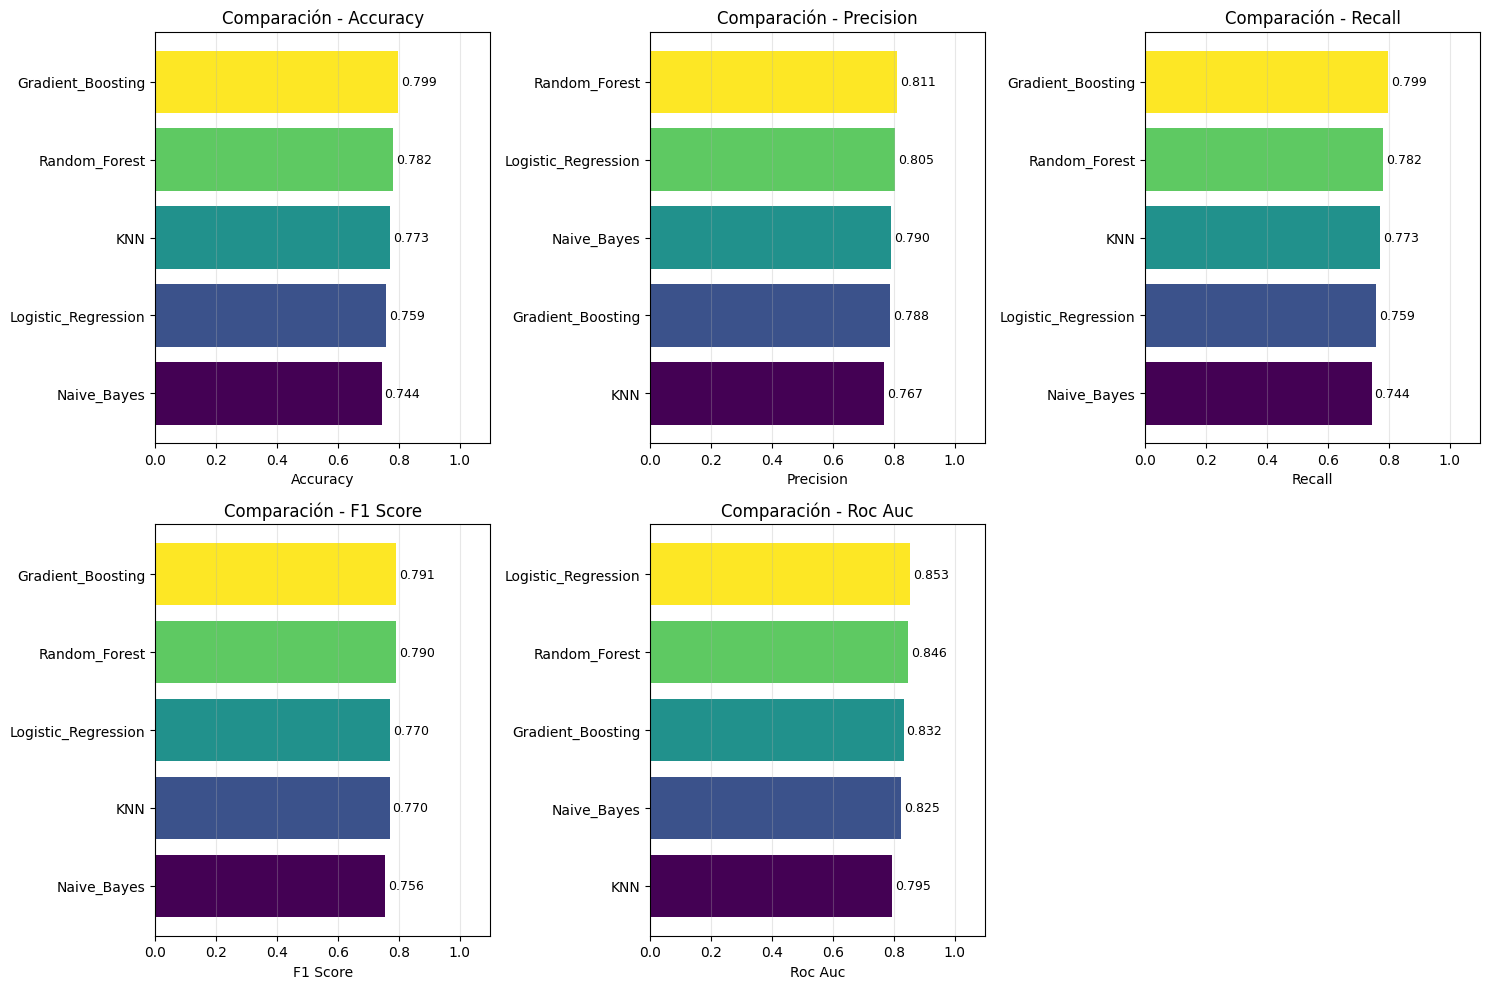

📋 REPORTE DETALLADO - Logistic_Regression
Call calculate_basic_metrics

📊 Métricas Básicas:
   Accuracy: 0.7587
   Precision: 0.8050
   Recall: 0.7587
   F1 Score: 0.7704
   Roc Auc: 0.8528
   Average Precision: 0.6773

🎯 Métricas de Matriz de Confusión:
   Verdaderos Positivos: 233
   Verdaderos Negativos: 622
   Falsos Positivos: 206
   Falsos Negativos: 66
   Sensibilidad (Recall): 0.7793
   Especificidad: 0.7512

📈 Reporte de Clasificación:
              precision    recall  f1-score   support

    No Churn       0.90      0.75      0.82       828
       Churn       0.53      0.78      0.63       299

    accuracy                           0.76      1127
   macro avg       0.72      0.77      0.73      1127
weighted avg       0.81      0.76      0.77      1127


📊 Generando visualizaciones...


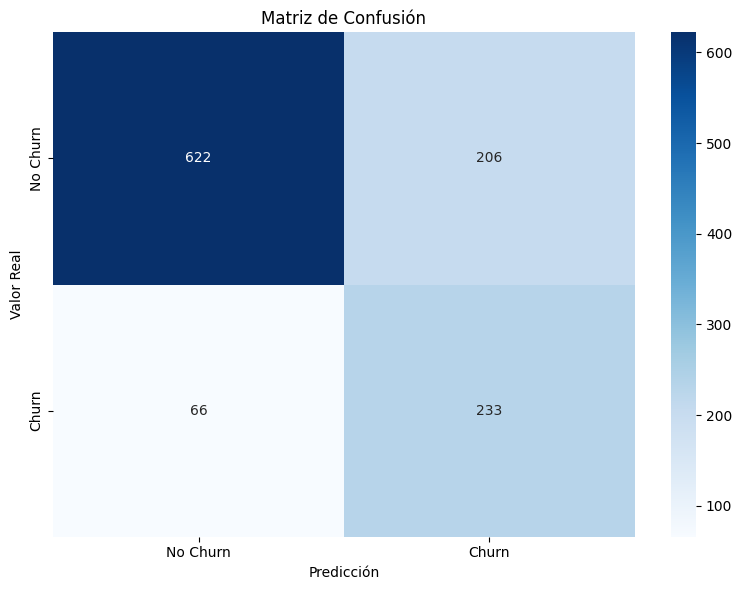

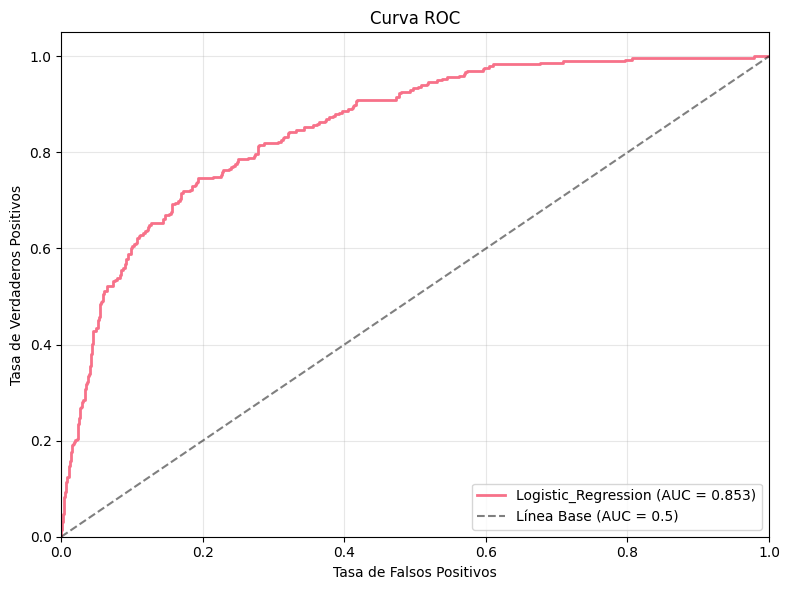

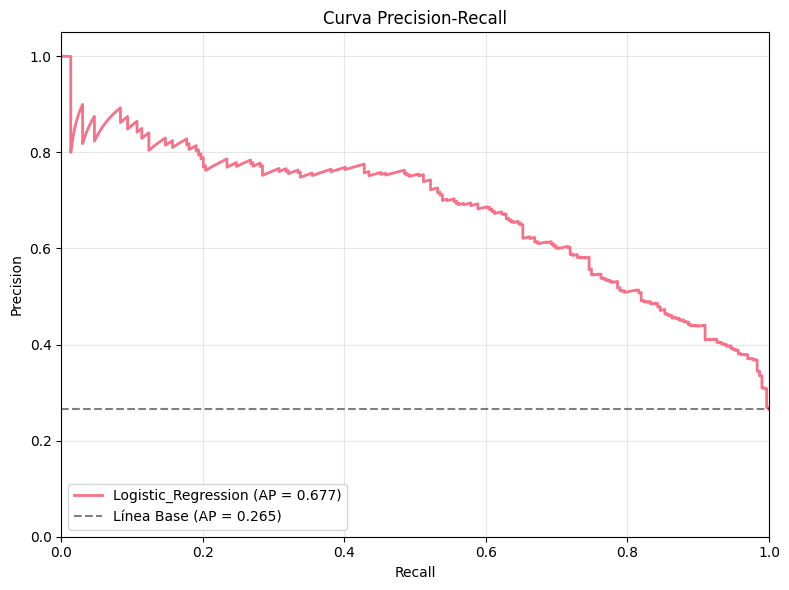


🎯 Métricas de Curvas:
   ROC AUC: 0.8528
   Average Precision: 0.6773

🏆 Mejor modelo seleccionado: Logistic_Regression


In [21]:
# 4.4.1 Evaluación de modelos
try:
    from metrics import MetricsCalculator
    
    #📊 Evaluando modelos..."
    results = predictor.evaluate_models(X_val, y_val)
    best_model_name, best_model = predictor.get_best_model('ROC_AUC',results)
    predictor.generate_model_report(X_val, y_val)
    calc = MetricsCalculator()
    y_pred = best_model.predict(X_val)
    y_pred_proba = best_model.predict_proba(X_val)[:, 1]
    calc.compare_models(results)
    detailed_report = calc.generate_detailed_report(y_val, y_pred, y_pred_proba, class_names=['No Churn', 'Churn'], model_name=best_model_name)
    print(f"\n🏆 Mejor modelo seleccionado: {best_model_name}")
except ImportError:
    print("⚠️ Módulo metrics no disponible, evaluando modelos básicamente...")
    results = predictor.evaluate_models(X_val, y_val)
    best_model_name, best_model = predictor.get_best_model('ROC_AUC')
    print(f"\n🏆 Mejor modelo seleccionado: {best_model_name}")

#  **5. Selección de Modelo y Generación de Submission para Kaggle**

## Basado en tus resultados de validación, elige el mejor modelo . Luego, re-entrénalo usando **todos los datos de `train.csv`** y úsalo para hacer predicciones sobre `test.csv`.

# **Función para generar el archivo de submission**

In [22]:
# Predicciones finales y creación del archivo de submission
from submission import create_submission_file
from datetime import datetime

print("📄 Generando predicciones finales...")

# Generar timestamp unico para evitar sobrescribir archivos
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
submission_file = (
    f"submissions/submission_grupoM_{timestamp}.csv"
)
print(f" Archivo de submission: {submission_file}")

print(f"📊 Datos para entrenamiento final: {len(X_train_clean):,} muestras")
print(f'Best Model: {best_model}')

# Crear archivo de submission
submission_df = create_submission_file(
    final_model=best_model_name,
    X_train_full=X_train_clean,  # Solo características
    y_train_full=y_train_sync,   # Variable objetivo sincronizada.
    X_test_full=X_test_clean, # Solo características de test
    customer_ids=customer_ids,
    filename=submission_file
)

# Mostrar primeras predicciones
print(f"\n📋 Primeras 10 predicciones:")
print(submission_df.head(10))

# Estadísticas de las predicciones
predictions = submission_df.iloc[:, 1].values
print(f"\n📊 Estadísticas de predicciones:")
print(f"   - Predicciones de churn (>0.5): {np.sum(predictions > 0.5):,} ({np.mean(predictions > 0.5)*100:.1f}%)")
print(f"   - Predicciones de no churn (≤0.5): {np.sum(predictions <= 0.5):,} ({np.mean(predictions <= 0.5)*100:.1f}%)")
print(f"   - Rango: [{predictions.min():.4f}, {predictions.max():.4f}]")

print(f"\n✅ Archivo de submission {submission_file} creado exitosamente")
print(f"🎯 Listo para subir a Kaggle!")

📄 Generando predicciones finales...
 Archivo de submission: submissions/submission_grupoM_20250806_035108.csv
📊 Datos para entrenamiento final: 5,634 muestras
Best Model: Pipeline(steps=[('features',
                 FunctionTransformer(func=<function ChurnPredictor.create_models.<locals>._normalize_and_engineer at 0x7feae06d3740>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges',
               

AttributeError: 'str' object has no attribute 'train_models'

In [ ]:
# Optimización de hiperparámetros para el mejor modelo
from models import hyperparameter_tuning

print(f"🔧 Optimizando hiperparámetros para {best_model_name}...")

from scipy.stats import loguniform
#Randomized (rápido):
logit_dist = {
    "classifier__C": loguniform(1e-3, 1e2),
    "classifier__solver": ["lbfgs", "liblinear", "saga"],  # según  preprocesamiento
    "classifier__penalty": ["l2"],                         # (lbfgs/liblinear/saga)
    "classifier__class_weight": [None, "balanced"],
    "classifier__max_iter": [2000],
}
#Grid fino (alrededor del mejor C):
logit_grid = {
    "classifier__C": [0.05, 0.1, 0.2, 0.5, 1, 2, 5],
    "classifier__solver": ["lbfgs", "liblinear"],
    "classifier__class_weight": [None, "balanced"],
}

# Definir grillas de parámetros según el modelo
if 'Logistic' in best_model_name:
    print(f'Tuneando hiper parametros para {best_model_name}')
    param_grid = logit_grid #or logit_dist
elif 'KNN' in best_model_name:
    print(f'Tuneando hiper parametros para {best_model_name}')
    param_grid = {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    }
elif 'Random' in best_model_name:
    print(f'Tuneando hiper parametros para {best_model_name}')
    param_grid = {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5]
    }
else:
    # Para Naive Bayes u otros
    print(f'Tuneando hiper parametros para {best_model_name}')
    param_grid = {
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
    }

# Realizar búsqueda de hiperparámetros
grid_search = hyperparameter_tuning(
    best_model, param_grid, X_train, y_train,
    cv=5, scoring='roc_auc'
)

print(f"\n🎯 Hiperparámetros optimizados:")
print(f"   - Mejor score CV: {grid_search.best_score_:.4f}")
print(f"   - Mejores parámetros: {grid_search.best_params_}")

# Actualizar el mejor modelo con los parámetros optimizados
optimized_model = grid_search.best_estimator_

# Evaluar modelo optimizado
y_pred_opt = optimized_model.predict(X_val)
y_pred_proba_opt = optimized_model.predict_proba(X_val)[:, 1]

# Calcular métricas del modelo optimizado
from sklearn.metrics import roc_auc_score, accuracy_score
opt_auc = roc_auc_score(y_val, y_pred_proba_opt)
opt_acc = accuracy_score(y_val, y_pred_opt)

print(f"\n📈 Mejora con optimización:")
print(f"   - ROC AUC original: {results[best_model_name]['ROC_AUC']:.4f}")
print(f"   - ROC AUC optimizado: {opt_auc:.4f}")
print(f"   - Mejora: {opt_auc - results[best_model_name]['ROC_AUC']:.4f}")

# Guardar el modelo optimizado
best_model = optimized_model

#  **6. Conclusiones (Opcional pero Recomendado)**

## Escribe un breve resumen de tus hallazgos.
* ## ¿Qué modelo funcionó mejor y por qué crees que fue así?
* ## ¿Cuáles fueron las características más importantes o los descubrimientos más interesantes del EDA?
* ## ¿Qué desafíos encontraron y cómo los resolvieron?

In [ ]:
# 🧪 PRUEBA DE KERNEL - CELDA SIMPLE
print("🚀 ¡Kernel funcionando correctamente!")
print("✅ VS Code Jupyter Extension conectada")

# Test básico de Python
import sys
print(f"📍 Python version: {sys.version}")
print(f"📂 Python executable: {sys.executable}")

# Test de matemáticas básicas
resultado = 2 + 2
print(f"🧮 Test matemático: 2 + 2 = {resultado}")

# Test de pandas
try:
    import pandas as pd
    print(f"📊 Pandas version: {pd.__version__}")
    print("✅ Pandas importado correctamente")
except ImportError:
    print("❌ Error importando pandas")

print("\n🎉 ¡Kernel listo para trabajar!")

In [ ]:
# 🔧 DIAGNÓSTICO Y CORRECCIÓN COMPLETA DEL PROBLEMA DE COLUMNSTRANSFORMER
# Problema identificado: Los transformers no tienen atributo 'transformers_' porque no han sido fitted

print("🔍 DIAGNÓSTICO COMPLETO DEL PROBLEMA")
print("=" * 60)

# 1. Verificar estado del predictor y modelos
print("\n1️⃣ Estado actual del predictor:")
print(f"   - Predictor existe: {predictor is not None}")
if hasattr(predictor, 'models'):
    print(f"   - Modelos creados: {len(predictor.models) if predictor.models else 0}")
    if predictor.models:
        print(f"   - Nombres de modelos: {list(predictor.models.keys())}")
else:
    print("   - No hay modelos en el predictor")

# 2. Verificar estado del preprocessor
print("\n2️⃣ Estado del preprocessor:")
if hasattr(predictor, 'preprocessor') and predictor.preprocessor is not None:
    print(f"   - Preprocessor existe: {type(predictor.preprocessor).__name__}")
    
    # Verificar si está fitted
    if hasattr(predictor.preprocessor, 'transformers_'):
        print("   ✅ Preprocessor está fitted (tiene transformers_)")
    else:
        print("   ❌ Preprocessor NO está fitted (falta transformers_)")
        print("   🔧 Esto causa el error en evaluate_models")
else:
    print("   ❌ No hay preprocessor configurado")

# 3. Verificar datos de entrenamiento
print("\n3️⃣ Estado de los datos:")
print(f"   - X_train_split shape: {X_train_split.shape}")
print(f"   - y_train_mapped shape: {y_train_mapped.shape if hasattr(y_train_mapped, 'shape') else len(y_train_mapped)}")
print(f"   - X_val shape: {X_val.shape}")
print(f"   - y_val shape: {y_val.shape if hasattr(y_val, 'shape') else len(y_val)}")

print("\n🔧 APLICANDO CORRECCIÓN...")
print("=" * 60)

# SOLUCIÓN: Re-entrenar completamente con verificación paso a paso
print("\n🚀 Paso 1: Recrear preprocessor y verificar fitting")

# Crear preprocessor y fittear explícitamente
predictor.create_preprocessor(X_train_split)

# Verificar que el preprocessor se creó correctamente
if hasattr(predictor, 'preprocessor') and predictor.preprocessor is not None:
    print("✅ Preprocessor recreado exitosamente")
    
    # Fit del preprocessor de manera explícita
    print("🔧 Fitting preprocessor...")
    predictor.preprocessor.fit(X_train_split)
    
    # Verificar que ahora tiene transformers_
    if hasattr(predictor.preprocessor, 'transformers_'):
        print("✅ Preprocessor fitted correctamente (transformers_ disponible)")
    else:
        print("❌ Aún hay problemas con el fitting del preprocessor")
else:
    print("❌ Error recreando preprocessor")

print("\n🚀 Paso 2: Recrear y entrenar modelos")

# Recrear modelos con preprocessor fitted
models = predictor.create_models(X_train_split)
print(f"✅ Modelos recreados: {list(models.keys())}")

# Entrenar modelos
print("\n🎯 Entrenando modelos con datos limpios...")
try:
    predictor.train_models(X_train_split, y_train_mapped)
    print("✅ Entrenamiento completado sin errores")
except Exception as e:
    print(f"❌ Error en entrenamiento: {e}")

print("\n🚀 Paso 3: Verificar que los modelos están listos para evaluación")

# Verificar estado de los modelos
for name, model in predictor.models.items():
    print(f"\n🔍 Verificando {name}:")
    
    # Verificar que el pipeline tiene preprocessor fitted
    if hasattr(model, 'named_steps') and 'preprocessor' in model.named_steps:
        preprocessor = model.named_steps['preprocessor']
        if hasattr(preprocessor, 'transformers_'):
            print(f"   ✅ Preprocessor fitted correctamente")
        else:
            print(f"   ❌ Preprocessor no fitted")
    
    # Test de predicción simple
    try:
        # Tomar una muestra pequeña para test
        sample_X = X_val.head(5)
        sample_pred = model.predict(sample_X)
        sample_proba = model.predict_proba(sample_X)
        print(f"   ✅ Predicción test exitosa: {len(sample_pred)} predicciones")
    except Exception as e:
        print(f"   ❌ Error en test de predicción: {e}")

print("\n🎯 CORRECCIÓN COMPLETADA - LISTA PARA EVALUACIÓN")
print("=" * 60)

In [ ]:
# 🔍 DEPURACIÓN DETALLADA DEL ERROR "A given column is not a column of the dataframe"

print("🔍 DEPURANDO EL ERROR DE CREATE_MODELS")
print("=" * 60)

# 1. Verificar las columnas disponibles
print("1️⃣ Verificando columnas en X_train_split:")
print(f"   - Shape: {X_train_split.shape}")
print(f"   - Columnas: {list(X_train_split.columns)}")
print(f"   - Contiene 'Churn': {'Churn' in X_train_split.columns}")
print(f"   - Contiene 'customerID': {'customerID' in X_train_split.columns}")

# 2. Probar FeatureEngineer paso a paso
print("\n2️⃣ Probando FeatureEngineer...")
try:
    from models import FeatureEngineer
    
    fe = FeatureEngineer()
    print("   ✅ FeatureEngineer instanciado")
    
    # Aplicar transform
    X_engineered = fe.transform(X_train_split)
    print(f"   ✅ Transform exitoso - Nueva shape: {X_engineered.shape}")
    print(f"   - Nuevas columnas: {set(X_engineered.columns) - set(X_train_split.columns)}")
    
except Exception as e:
    print(f"   ❌ Error en FeatureEngineer: {e}")
    print(f"   Tipo de error: {type(e).__name__}")

# 3. Probar el método _normalize_service_values
print("\n3️⃣ Probando _normalize_service_values...")
try:
    X_normalized = predictor._normalize_service_values(X_train_split)
    print(f"   ✅ Normalización exitosa - Shape: {X_normalized.shape}")
    
    # Verificar algunos cambios específicos
    for col in ['OnlineSecurity', 'MultipleLines']:
        if col in X_train_split.columns:
            original_values = set(X_train_split[col].unique())
            normalized_values = set(X_normalized[col].unique())
            if original_values != normalized_values:
                print(f"   - {col}: {original_values} → {normalized_values}")
    
except Exception as e:
    print(f"   ❌ Error en _normalize_service_values: {e}")

# 4. Probar _pick_preprocessor para cada modelo
print("\n4️⃣ Probando _pick_preprocessor para cada modelo...")

# Aplicar normalización y feature engineering primero
try:
    fe = FeatureEngineer()
    X_for_schema = fe.transform(predictor._normalize_service_values(X_train_split))
    print(f"   ✅ X_for_schema preparado - Shape: {X_for_schema.shape}")
    
    models_to_test = ["Logistic_Regression", "Random_Forest", "Naive_Bayes", "KNN"]
    
    for model_name in models_to_test:
        try:
            preprocessor = predictor._pick_preprocessor(model_name, X_for_schema)
            print(f"   ✅ {model_name}: Preprocessor creado exitosamente")
            
            # Probar fit del preprocessor
            preprocessor.fit(X_for_schema)
            print(f"   ✅ {model_name}: Preprocessor fitted exitosamente")
            
        except Exception as e:
            print(f"   ❌ {model_name}: Error - {e}")
            print(f"      Tipo de error: {type(e).__name__}")
            
            # Información adicional para debugging
            if "column" in str(e).lower():
                print(f"      Columnas disponibles en X_for_schema: {list(X_for_schema.columns)}")

except Exception as e:
    print(f"   ❌ Error preparando X_for_schema: {e}")

print("\n🎯 DIAGNÓSTICO COMPLETADO")
print("=" * 60)